In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [67]:
cancer_data = np.genfromtxt(
 fname ='https://raw.githubusercontent.com/nursnaaz/MachineLearningWithPython/master/KNN%20Classification/breast-cancer-wisconsin.data', delimiter= ',', dtype= float)

In [50]:
type(cancer_data)

numpy.ndarray

In [51]:
cancer_data.shape

(699, 10)

In [56]:
print ("Dataset Lenght:: ", len(cancer_data))
print ("Dataset:: ", str(cancer_data))
print ("Dataset Shape:: ", cancer_data.shape)

Dataset Lenght::  699
Dataset::  [[1.000025e+06 5.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.002945e+06 5.000000e+00 4.000000e+00 ... 2.000000e+00 1.000000e+00
  2.000000e+00]
 [1.015425e+06 3.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  2.000000e+00]
 ...
 [8.888200e+05 5.000000e+00 1.000000e+01 ... 1.000000e+01 2.000000e+00
  4.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 6.000000e+00 1.000000e+00
  4.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 4.000000e+00 1.000000e+00
  4.000000e+00]]
Dataset Shape::  (699, 11)


In [68]:
cancer_data = np.delete(arr = cancer_data, obj= 0, axis = 1)

In [69]:
X = cancer_data[:,range(0,9)]
Y = cancer_data[:,9]

In [70]:
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [7]:
type(X)

numpy.ndarray

In [72]:
X=pd.DataFrame(X)

In [73]:
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(X)

In [74]:
X=pd.DataFrame(X)

In [75]:
X.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)


In [41]:
#y_train = y_train.ravel()
#y_test = y_test.ravel()

In [76]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  95.23809523809523 % for K-Value: 1
Accuracy is  93.33333333333333 % for K-Value: 2
Accuracy is  95.71428571428572 % for K-Value: 3
Accuracy is  95.23809523809523 % for K-Value: 4
Accuracy is  95.71428571428572 % for K-Value: 5
Accuracy is  94.76190476190476 % for K-Value: 6
Accuracy is  94.76190476190476 % for K-Value: 7
Accuracy is  94.28571428571428 % for K-Value: 8
Accuracy is  94.76190476190476 % for K-Value: 9
Accuracy is  94.28571428571428 % for K-Value: 10
Accuracy is  94.28571428571428 % for K-Value: 11
Accuracy is  94.76190476190476 % for K-Value: 12
Accuracy is  94.76190476190476 % for K-Value: 13
Accuracy is  93.80952380952381 % for K-Value: 14
Accuracy is  93.80952380952381 % for K-Value: 15
Accuracy is  93.80952380952381 % for K-Value: 16
Accuracy is  93.80952380952381 % for K-Value: 17
Accuracy is  93.80952380952381 % for K-Value: 18
Accuracy is  93.80952380952381 % for K-Value: 19
Accuracy is  93.80952380952381 % for K-Value: 20
Accuracy is  93.8095238095238

In [77]:
from sklearn.metrics import confusion_matrix,classification_report


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print ("Accuracy for Logistic Regression is ", accuracy_score(y_test,y_pred)*100)

[[123   6]
 [  7  74]]
             precision    recall  f1-score   support

        2.0       0.95      0.95      0.95       129
        4.0       0.93      0.91      0.92        81

avg / total       0.94      0.94      0.94       210

Accuracy for Logistic Regression is  93.80952380952381


## Identifying K value

In [88]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

In [89]:
error

[0.047619047619047616,
 0.06666666666666667,
 0.04285714285714286,
 0.047619047619047616,
 0.04285714285714286,
 0.05238095238095238,
 0.05238095238095238,
 0.05714285714285714,
 0.05238095238095238]

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Mean Error')

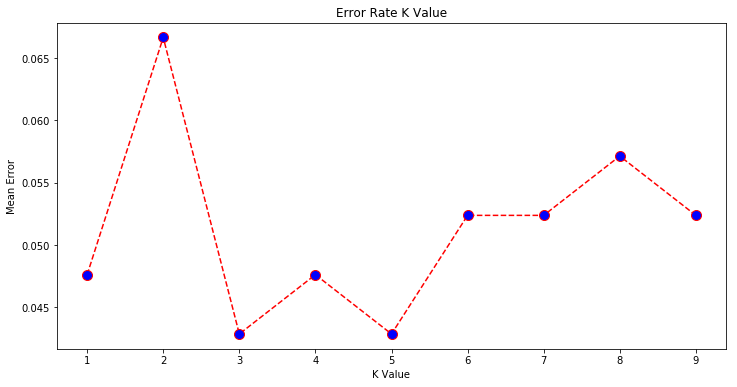

In [90]:
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')
#plt.show()